Importer librairies
importer fichiers csv train.set et validation.set

Créer source et dataset

Splitter le train.set de 10% en 10% (0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9)
entrainer le modèle sur ces train.set.splitter
faire les prédictions avec le validation.set

calculer accuracy et AUC pour tous ces cas

In [2]:
from bigml.api import BigML
from pandas import read_csv
from sklearn.metrics import roc_auc_score

# train_set = read_csv('csv_file/train_set.csv')
# validation_set = read_csv('csv_file/validation_set.csv')

api = BigML(project='project/5d94a454eba31d46690001d1')

In [4]:
#Train_set
# Creation d'une source
train_source = api.create_source('csv_file/train_set.csv')
api.ok(train_source)
# Creation d'un dataset ( = source )
train_dataset = api.create_dataset(train_source)
api.ok(train_dataset)

True

In [5]:
# Validation_set
# Creation d'une source
validation_source = api.create_source('csv_file/validation_set.csv')
api.ok(validation_source)
# Creation d'un dataset ( = source )
validation_dataset = api.create_dataset(validation_source)
api.ok(validation_dataset)

True

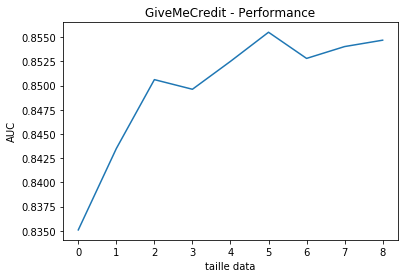

In [22]:
def calcul_auc(split_rate):
    from bigml.api import BigML
    from pandas import read_csv
    from sklearn.metrics import roc_auc_score
    import json
    
    train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_split_set)
    
    ensemble = api.create_ensemble(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    batch_prediction_validation_set_split = api.create_batch_prediction(ensemble, validation_dataset,{"header": True, 
                                                                                                            "all_fields": True,
                                                                                                            "prediction_name": "my_prediction", 
                                                                                                            "probabilities": True})
    api.ok(batch_prediction_validation_set_split)
    
    api.download_batch_prediction(batch_prediction_validation_set_split,filename='BatchPrediction/Validation_set_pred_split.csv')
    
    pred_split = read_csv('BatchPrediction/Validation_set_pred_split.csv', index_col = 0)

    actual = pred_split['SeriousDlqin2yrs']
    scores = pred_split['1 probability']
    auc = np.float64(roc_auc_score(actual, scores))

    return np.float64(auc)


import matplotlib.pyplot as plt
import numpy as np

table = [calcul_auc(n/10) for n in range(1,10)]
plt.xlabel("taille data")
plt.ylabel("AUC")
plt.title("GiveMeCredit - Performance")
plt.plot(table)

0.8321082323878752
0.8323794961054553
0.8446787294327738
0.8343984968906153
0.8486067731250923
0.8376676090656506
0.8514061281500058
0.8413658681915295
0.8527798257751515
0.8420177860259241
0.8538756184077698
0.833905650448153
0.8542687659243188
0.8398904322636506
0.8546278558479795
0.8413518496926082
0.8557144801517651
0.8400786312766809


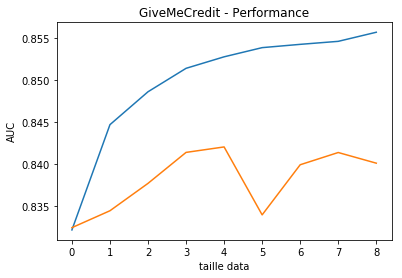

In [25]:
def comparaison_models(split_rate):
    from bigml.api import BigML
    from pandas import read_csv
    from sklearn.metrics import roc_auc_score
    import json
    
    train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_split_set)
    
    ensemble = api.create_ensemble(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    batch_prediction_val_set_split_ensemble = api.create_batch_prediction(ensemble, validation_dataset,{"header": True, 
                                                                                                            "all_fields": True,
                                                                                                            "prediction_name": "my_prediction", 
                                                                                                            "probabilities": True})
    api.ok(batch_prediction_val_set_split_ensemble)
    
    api.download_batch_prediction(batch_prediction_val_set_split_ensemble,filename='BatchPrediction/Val_set_pred_split_ensemble.csv')
    
    pred_split_ensemble = read_csv('BatchPrediction/Val_set_pred_split_ensemble.csv', index_col = 0)

    actual_e = pred_split_ensemble['SeriousDlqin2yrs']
    scores_e = pred_split_ensemble['1 probability']
    auc_ensemble = np.float64(roc_auc_score(actual_e, scores_e))
    print (auc_ensemble)
    
    
    deepnet = api.create_deepnet(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(deepnet)
    
    batch_prediction_val_set_split_deepnet = api.create_batch_prediction(deepnet, validation_dataset,{"header": True, 
                                                                                                            "all_fields": True,
                                                                                                            "prediction_name": "my_prediction", 
                                                                                                            "probabilities": True})
    api.ok(batch_prediction_val_set_split_deepnet)
    
    api.download_batch_prediction(batch_prediction_val_set_split_deepnet,filename='BatchPrediction/Val_set_pred_split_deepnet.csv')
    
    pred_split_deepnet = read_csv('BatchPrediction/Val_set_pred_split_deepnet.csv', index_col = 0)

    actual_d = pred_split_deepnet['SeriousDlqin2yrs']
    scores_d = pred_split_deepnet['1 probability']
    auc_deepnet = np.float64(roc_auc_score(actual_d, scores_d))
    print (auc_deepnet)
    
    return np.float64(auc_ensemble), np.float64(auc_deepnet)


import matplotlib.pyplot as plt
import numpy as np

table = [comparaison_models(n/10) for n in range(1,10)]
plt.xlabel("taille data")
plt.ylabel("AUC")
plt.title("GiveMeCredit - Comparaison_models")
plt.plot(table)

0.8521560224566833
0.8335423753685842
0.8680382012615838
0.8466378257405709
0.8735255295655872
0.8503879737062261
0.8755526046452577
0.8511109593893574
0.8781706958511166
0.852971802068726
0.8792968022913971
0.8544961564397091
0.8811558580560745
0.8533657121348683
0.8819229942045896
0.8552594331153123
0.8821514274635096
0.8545271993016463


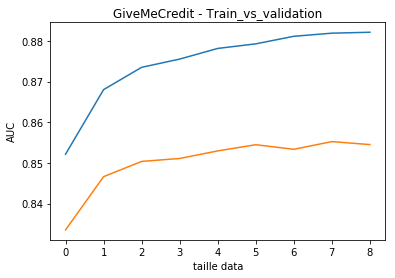

In [6]:
def train_vs_validation(split_rate):
    from bigml.api import BigML
    from pandas import read_csv
    from sklearn.metrics import roc_auc_score
    import json
    
    train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_split_set)
    
    ensemble = api.create_ensemble(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    batch_prediction_train_set_ensemble = api.create_batch_prediction(ensemble, train_dataset,{"header": True, 
                                                                                                   "all_fields": True,
                                                                                                   "prediction_name": "my_prediction", 
                                                                                                   "probabilities": True})
    api.ok(batch_prediction_train_set_ensemble)
    
    api.download_batch_prediction(batch_prediction_train_set_ensemble,filename='BatchPrediction/Train_set_pred_ensemble.csv')
    
    pred_ensemble_t = read_csv('BatchPrediction/Train_set_pred_ensemble.csv', index_col = 0)

    actual_e_t = pred_ensemble_t['SeriousDlqin2yrs']
    scores_e_t = pred_ensemble_t['1 probability']
    auc_ensemble_t = np.float64(roc_auc_score(actual_e_t, scores_e_t))
    print (auc_ensemble_t)
    
    batch_prediction_val_set_split_ensemble = api.create_batch_prediction(ensemble, validation_dataset,{"header": True, 
                                                                                                            "all_fields": True,
                                                                                                            "prediction_name": "my_prediction", 
                                                                                                            "probabilities": True})
    api.ok(batch_prediction_val_set_split_ensemble)
    
    api.download_batch_prediction(batch_prediction_val_set_split_ensemble,filename='BatchPrediction/Val_set_pred_split_ensemble.csv')
    
    pred_split_ensemble_v = read_csv('BatchPrediction/Val_set_pred_split_ensemble.csv', index_col = 0)

    actual_e_v = pred_split_ensemble_v['SeriousDlqin2yrs']
    scores_e_v = pred_split_ensemble_v['1 probability']
    auc_ensemble_v = np.float64(roc_auc_score(actual_e_v, scores_e_v))
    print (auc_ensemble_v)
    
    return np.float64(auc_ensemble_t), np.float64(auc_ensemble_v)


import matplotlib.pyplot as plt
import numpy as np

table = [train_vs_validation(n/10) for n in range(1,10)]
plt.xlabel("taille data")
plt.ylabel("AUC")
plt.title("GiveMeCredit - Train_vs_validation")
plt.plot(table)